In [275]:
## Standard stuff:
import numpy as np, seaborn as sns, pandas as pd
## For text classification:
import nltk, nltk.sentiment, sklearn
%matplotlib inline

In [276]:
### Download data as pandas dataframe
import requests
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(path2data)

In [277]:
# Download positive and negative sentiment lexicons, split into words and convert to set representation. 
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split(';\n')[-1].split('\n'))
positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split(';\n')[-1].split('\n'))
print(len(negative),len(positive))

4784 2007


In [322]:
df1 = pd.read_csv (r'C:\Users\jtoft\Downloads\dataframe_tight_v2.csv')
df2 = pd.read_csv (r'C:\Users\jtoft\Downloads\dataframe_fiskebar.csv')
df3 = pd.read_csv (r'C:\Users\jtoft\Downloads\dataframe_mother.csv')

frames = [df1, df2, df3]

df = pd.read_csv (r'C:\Users\jtoft\Downloads\dataframe_all3.csv')

#df = pd.concat(frames)
#df.reset_index(drop=True)
#df = df.loc[~df.index.duplicated(keep='first')]
#df = df.to_csv(r'C:\Users\jtoft\Downloads\dataframe_all.csv')

In [323]:
# # dropping null value columns to avoid errors 
# df.dropna(inplace = True) 
   
df['country'] = df['location'].str.rsplit(',').str[-1] 
df.reset_index(drop=True)

,Unnamed: 0,name,location,bubble,dollars,rating,country
0,0,"The restaurant is cozy, the staffs are friendl...",NaN,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,NaN
1,1,Ate here last night with a group of friends. ...,"Waukesha, Wisconsin","<span class=""ui_bubble_rating bubble_40""></span>",NaN,40,Wisconsin
2,2,"Awesome!! Delicious food, nice staff. We had ...","Hong Kong, China","<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,China
3,3,We wanted a nice dinner. We could place our o...,"Sollentuna, Sweden","<span class=""ui_bubble_rating bubble_20""></span>",NaN,20,Sweden
4,4,Restuarant Tight is located off the main shopp...,"London, United Kingdom","<span class=""ui_bubble_rating bubble_40""></span>",NaN,40,United Kingdom
5,5,We concluded our trip to Denmark by stumbling ...,NaN,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,NaN
6,6,Visited on a Sunday night\nWe booked a table b...,"Newquay, United Kingdom","<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,United Kingdom
7,7,"Based on reviews of this establishment, my hus...",NaN,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,NaN
8,8,"Had a late lunch at Tight, ordering off the lu...",Texas,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,Texas
9,9,A great dinner with most gracious staff for ou...,"Aurora, Colorado","<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,Colorado


In [324]:
# initialize tokenizer
tokenizer = nltk.tokenize.TweetTokenizer()

# define function
def preprocessing(string):
    return tokenizer.tokenize(string.lower())

In [325]:
documents = df.name.apply(preprocessing)

In [326]:
# Define count function using a list comprehension.
def count_dictionary(tokenized_doc,dictionary):
    return len([word for word in tokenized_doc if word in dictionary])

In [327]:

df['positive_liu'] = documents.apply(count_dictionary,dictionary=positive)
df['negative_liu'] = documents.apply(count_dictionary,dictionary=negative)

In [328]:
# import nltk.sentiment
import nltk
nltk.download('vader_lexicon')
import nltk.sentiment
# initialize the vader function
vader = nltk.sentiment.vader.SentimentIntensityAnalyzer()
# apply the function and convert to dataframe
vader_df = pd.DataFrame(list(df['name'].apply(vader.polarity_scores)))
# rename columns adding the 'vader_' prefix using a list comprehension
vader_df.columns = ['vader_'+col for col in vader_df.columns]
# merge with original dataframe
df = pd.concat([df,vader_df],axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jtoft\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [329]:
from afinn import Afinn
afinn = Afinn()
df['afinn'] = df.name.apply(afinn.score)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


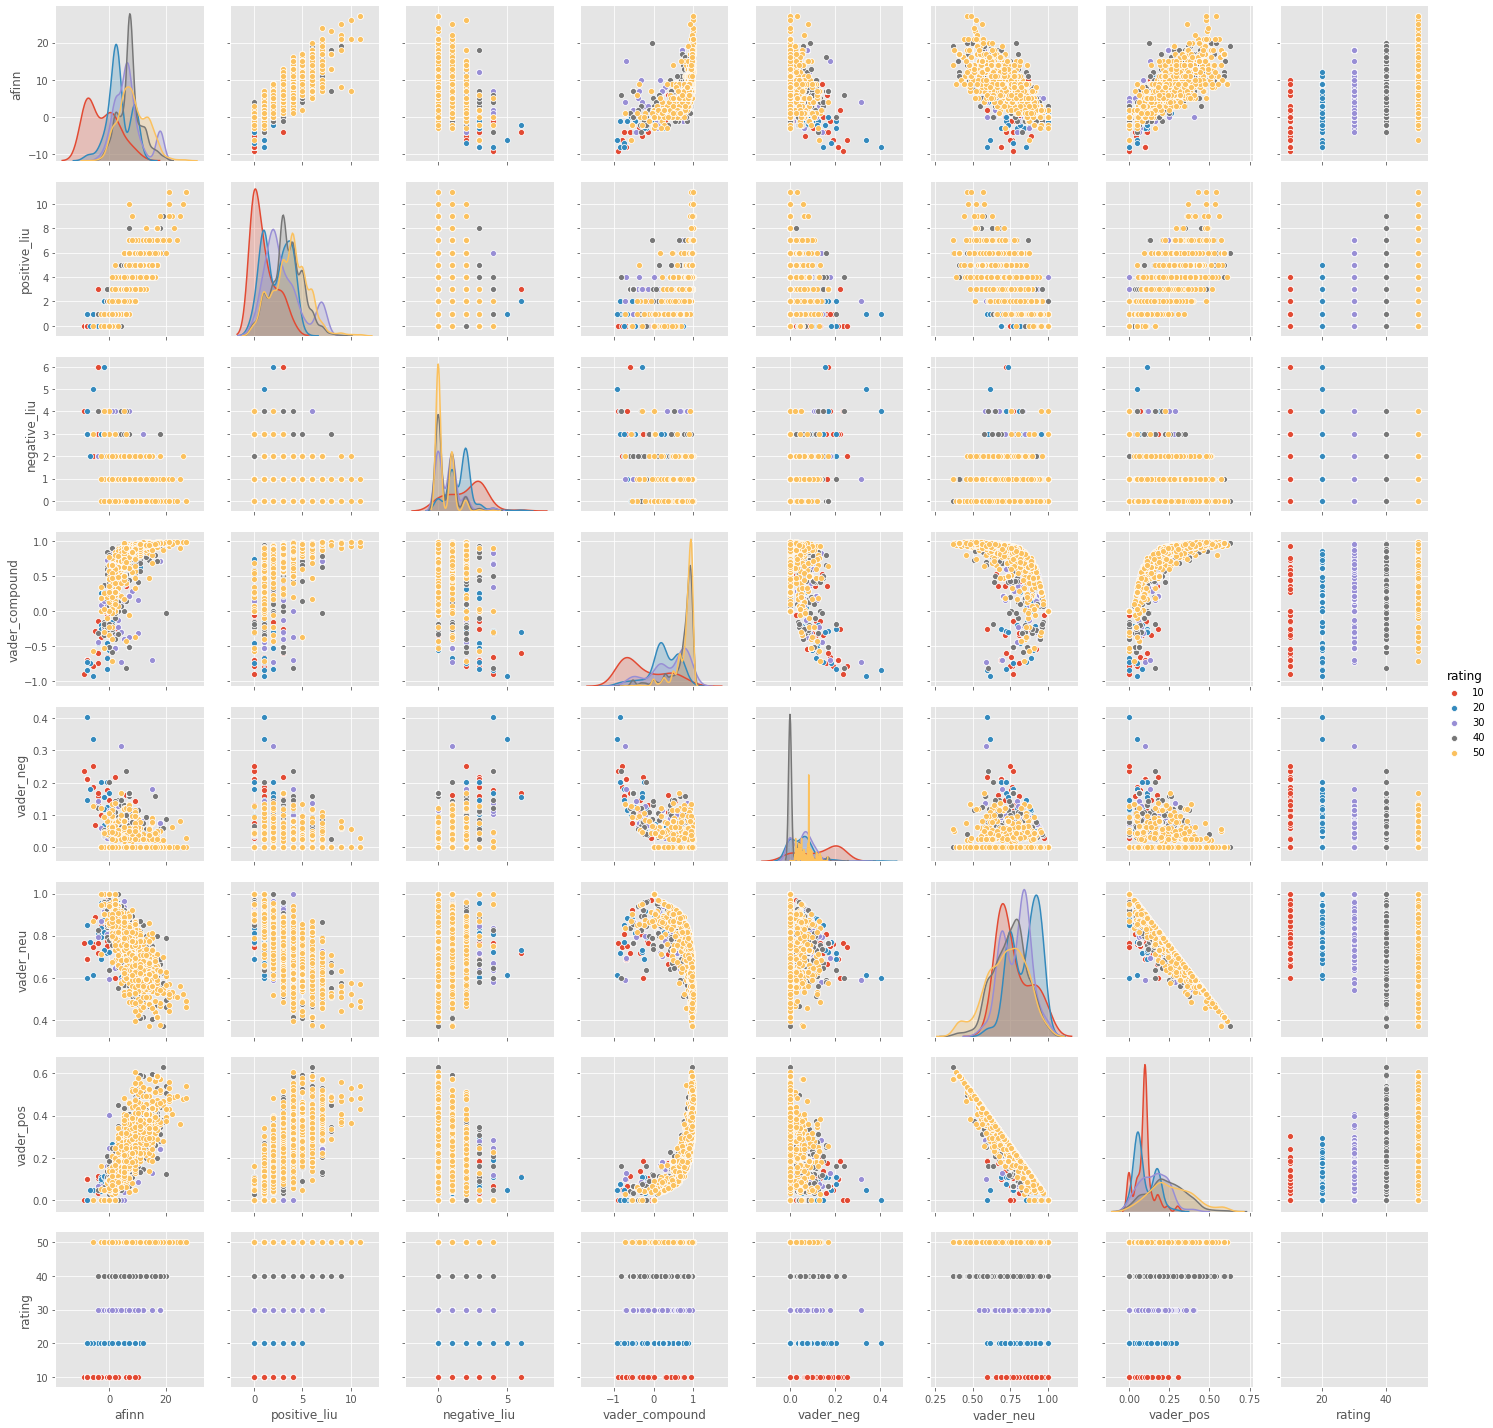

In [260]:
# # define columns
sentiment_columns = ['afinn','positive_liu','negative_liu']+[col for col in df.columns if 'vader_' in col]
hue = 'rating'
sns.pairplot(df.sample(2000)[sentiment_columns+[hue]],hue=hue)

In [402]:
# # Pick documents with positive LIU classification
positive_liu_reviews = df[((df.positive_liu-df.negative_liu)>0)]

# # We, now, want to get the indeces of these documents and the words within them LUI classified as positive:
for idx in df.loc[df[((df.positive_liu-df.negative_liu)>0)].vader_compound.sort_values().index].index:
    print(idx,set(documents[idx])&positive)

# # So that, in a final step, we can pick one and look at the whole text to assess why LUI and VADER disagree:
#print(df.name[235])

# #LIU defines 'well' as a positive word. However, 'well' is in the context of 'not' well.  
#print(vader.polarity_scores(df)

# # LIU defines 'work' as a positive word. However, here it is in the context of 'hard work'
# print(vader.polarity_scores('find it hard to work through'))

# The VADER understands these negations.

6281 {'good', 'worth'}
5383 {'renewed', 'good', 'ready'}
2889 {'sufficient', 'recommend'}
3325 {'perfect', 'recommend'}
1465 {'best', 'decent', 'good', 'excellent'}
3657 {'nice', 'good'}
6031 {'good', 'enough'}
5445 {'luck', 'fine', 'liked'}
3038 {'nice', 'good', 'outstanding', 'friendly'}
3334 {'good', 'clean'}
1132 {'pros', 'good', 'best'}
251 {'best', 'fine'}
3774 {'great'}
3263 {'good', 'afford'}
6056 {'like'}
5925 {'good', 'hot'}
3927 {'fresh', 'available', 'great'}
6034 {'nice', 'perfect'}
6322 {'trendy', 'cool'}
2931 {'fantastic', 'recommend'}
6421 {'amazing'}
6251 {'impressed'}
5281 {'good', 'appreciate'}
3675 {'trendy', 'welcome', 'smooth', 'modern'}
4257 {'delicious', 'incredible', 'inventive'}
5833 {'enough', 'greatest', 'like'}
3202 {'best', 'cool'}
853 {'nicer'}
6269 {'popular', 'good', 'fantastic', 'nice'}
513 {'gem'}
5321 {'better', 'good', 'spectacular'}
4073 {'vibrant', 'worth'}
1440 {'wow', 'enjoyable', 'excellent'}
5406 {'hot', 'like'}
6466 {'properly', 'free', 'reco

In [339]:
df.groupby('tourism').count()
#dft = df

,Unnamed: 0,name,location,bubble,dollars,rating,country,positive_liu,negative_liu,vader_compound,vader_neg,vader_neu,vader_pos,afinn
tourism,,,,,,,,,,,,,,
Local,503,503,503,503,0,503,503,503,503,503,503,503,503,503
Tourist,6696,6696,5600,6696,0,6696,5600,6696,6696,6696,6696,6696,6696,6696


In [341]:
import pandas as pd
df2 = df.drop_duplicates(subset=['name'])
df2.groupby('tourism').count()

,Unnamed: 0,name,location,bubble,dollars,rating,country,positive_liu,negative_liu,vader_compound,vader_neg,vader_neu,vader_pos,afinn
tourism,,,,,,,,,,,,,,
Local,433,433,433,433,0,433,433,433,433,433,433,433,433,433
Tourist,4125,4125,3514,4125,0,4125,3514,4125,4125,4125,4125,4125,4125,4125


In [335]:
df['country'].astype(str) # change type from 'object' to string

# lande = {' Denmark', ' Sweden', ' Norway', ' Finland', ' Iceland'}


df['tourism'] = np.where(dft['country'] == ' Denmark', 'Local', 'Tourist')#when splitting, there were a space in country column

# import numpy as np
# dft1 = np.where(np.in1d(dft['country'], [' Denmark', ' Sweden', ' Norway', ' Finland', ' Iceland']))



In [336]:
df

,Unnamed: 0,name,location,bubble,dollars,rating,country,positive_liu,negative_liu,vader_compound,vader_neg,vader_neu,vader_pos,afinn,tourism
0,0,"The restaurant is cozy, the staffs are friendl...",NaN,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,NaN,4,0,0.8550,0.000,0.710,0.290,8.0,Tourist
1,1,Ate here last night with a group of friends. ...,"Waukesha, Wisconsin","<span class=""ui_bubble_rating bubble_40""></span>",NaN,40,Wisconsin,3,0,0.7717,0.000,0.801,0.199,8.0,Tourist
2,2,"Awesome!! Delicious food, nice staff. We had ...","Hong Kong, China","<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,China,6,0,0.9715,0.000,0.411,0.589,17.0,Tourist
3,3,We wanted a nice dinner. We could place our o...,"Sollentuna, Sweden","<span class=""ui_bubble_rating bubble_20""></span>",NaN,20,Sweden,3,1,0.2263,0.000,0.947,0.053,3.0,Tourist
4,4,Restuarant Tight is located off the main shopp...,"London, United Kingdom","<span class=""ui_bubble_rating bubble_40""></span>",NaN,40,United Kingdom,3,0,0.8565,0.000,0.813,0.187,8.0,Tourist
5,5,We concluded our trip to Denmark by stumbling ...,NaN,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,NaN,4,0,0.9245,0.000,0.592,0.408,13.0,Tourist
6,6,Visited on a Sunday night\nWe booked a table b...,"Newquay, United Kingdom","<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,United Kingdom,3,0,0.8944,0.000,0.808,0.192,5.0,Tourist
7,7,"Based on reviews of this establishment, my hus...",NaN,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,NaN,1,1,0.6656,0.000,0.885,0.115,1.0,Tourist
8,8,"Had a late lunch at Tight, ordering off the lu...",Texas,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,Texas,4,0,0.8481,0.000,0.777,0.223,8.0,Tourist
9,9,A great dinner with most gracious staff for ou...,"Aurora, Colorado","<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,Colorado,5,0,0.9686,0.000,0.620,0.380,14.0,Tourist


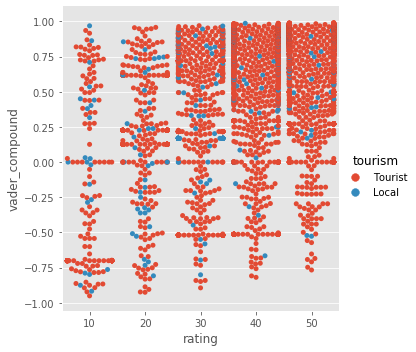

In [263]:
sns.catplot(x="rating", y="vader_compound", hue="tourism", kind="swarm", data=df)


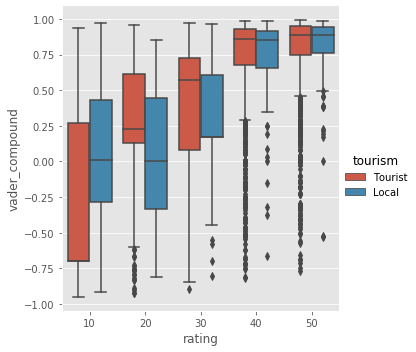

In [264]:
sns.catplot(x="rating", y="vader_compound", hue="tourism", kind="box", data=df);


In [96]:
%matplotlib inline 
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot']) # optional: for ggplot-like style

In [345]:
df = df2
df

,Unnamed: 0,name,location,bubble,dollars,rating,country,positive_liu,negative_liu,vader_compound,vader_neg,vader_neu,vader_pos,afinn,tourism
0,0,"The restaurant is cozy, the staffs are friendl...",NaN,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,NaN,4,0,0.8550,0.000,0.710,0.290,8.0,Tourist
1,1,Ate here last night with a group of friends. ...,"Waukesha, Wisconsin","<span class=""ui_bubble_rating bubble_40""></span>",NaN,40,Wisconsin,3,0,0.7717,0.000,0.801,0.199,8.0,Tourist
2,2,"Awesome!! Delicious food, nice staff. We had ...","Hong Kong, China","<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,China,6,0,0.9715,0.000,0.411,0.589,17.0,Tourist
3,3,We wanted a nice dinner. We could place our o...,"Sollentuna, Sweden","<span class=""ui_bubble_rating bubble_20""></span>",NaN,20,Sweden,3,1,0.2263,0.000,0.947,0.053,3.0,Tourist
4,4,Restuarant Tight is located off the main shopp...,"London, United Kingdom","<span class=""ui_bubble_rating bubble_40""></span>",NaN,40,United Kingdom,3,0,0.8565,0.000,0.813,0.187,8.0,Tourist
5,5,We concluded our trip to Denmark by stumbling ...,NaN,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,NaN,4,0,0.9245,0.000,0.592,0.408,13.0,Tourist
6,6,Visited on a Sunday night\nWe booked a table b...,"Newquay, United Kingdom","<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,United Kingdom,3,0,0.8944,0.000,0.808,0.192,5.0,Tourist
7,7,"Based on reviews of this establishment, my hus...",NaN,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,NaN,1,1,0.6656,0.000,0.885,0.115,1.0,Tourist
8,8,"Had a late lunch at Tight, ordering off the lu...",Texas,"<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,Texas,4,0,0.8481,0.000,0.777,0.223,8.0,Tourist
9,9,A great dinner with most gracious staff for ou...,"Aurora, Colorado","<span class=""ui_bubble_rating bubble_50""></span>",NaN,50,Colorado,5,0,0.9686,0.000,0.620,0.380,14.0,Tourist


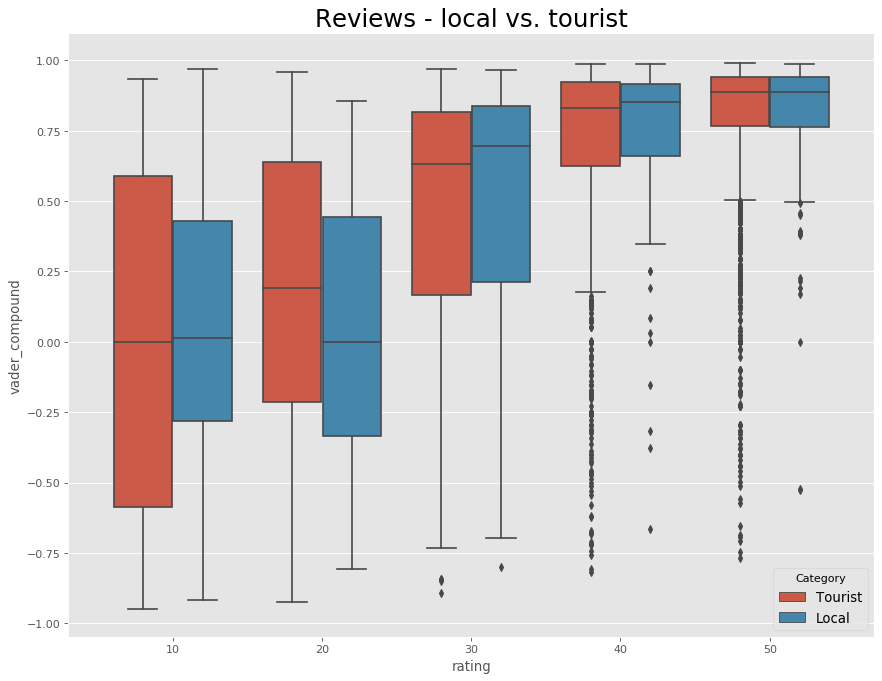

<Figure size 432x288 with 0 Axes>

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='rating', y='vader_compound', data=df, hue='tourism')
#sns.stripplot(x='rating', y='vader_compound', data=df, color='black', size=2, jitter=1)

for i in range(len(df['tourism'].unique())-1):
    plt.vlines(i+.1, 1, 1, linestyles='solid', colors='gray', alpha=0.4)

# Decoration
plt.title('Reviews - local vs. tourist', fontsize=22)
plt.legend(title='Category', fontsize=12)
fig1 = plt.gcf()
fig.tight_layout()
plt.show()
plt.draw()
fig1.savefig('boxplot_category.png', dpi=100)



In [396]:
stat = df.iloc[:,9:16:5] 
stat2 = df.groupby('tourism').describe()

stat2.to_csv(r'C:\Users\jtoft\Downloads\statestik.csv')
